In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
### Condiones del paso
h = 0.5
xmin = 10.
xmax = 1000.

In [3]:
Npoints = (xmax-xmin)/h
x_ = np.linspace(xmin, xmax, int(Npoints)+1)
print(Npoints, " \n ", x_)

1980.0  
  [   10.     10.5    11.  ...,   999.    999.5  1000. ]


## 2D Equilibrium:
### $\frac{d}{ds}( T \frac{dx}{ds} ) =  - f_{x}$,  $ \ \frac{d}{ds}( T \frac{dy}{ds} ) =  - f_{y}$. 
### $s$ is the arc length, the force only depend on the weight of the string.

In [4]:
## Boundary conditions
T0 = 0.

y1 = 180.  # height of the first point 
y2 = 120.  # height of the second point
c = 90.    # height of the minimum

h1 = y1-c
h2 = y2-c
Xt = 300.  # width of the chain

## $y(x) = c cosh(\frac{x}{c}) $
### $c(cosh^{-1}(1+\frac{h1}{c}) + cosh^{-1}(1+\frac{h2}{c}) ) - x_{t} = 0$ 

In [5]:
# Functions for the parameter 
def F1(x):
    f = x*( np.arccosh(1.+ h1/x) + np.arccosh(1.+ h2/x) ) - Xt 
    if(f.any() != 0):
        return f
    else:
        return -1

def dF1(x):
    df = np.arccosh(1.+ h1/x) + np.arccosh(1.+ h2/x) - \
    (1./x)*( (h1)/( np.sqrt( (1+h1/x)**2 -1 ) ) + (h2)/( np.sqrt( (1+h2/x)**2 -1 ) ) )
    if(df != 0):
        return df
    else:
        return -1

In [6]:
## Newton Method

x=10.
x1=0.
error = 1.0

while(error > 0.0001):
    x1 = x - F1(x)/dF1(x)
    error = abs(x1-x)/abs(x1)
    x = x1
    print(x, x1, error)

c=x
print(c)

83.8508493013 83.8508493013 0.88074062358
181.439041289 181.439041289 0.537856633802
210.130975668 210.130975668 0.13654309788
211.303770107 211.303770107 0.00555027692494
211.305459155 211.305459155 7.99339613657e-06
211.305459155


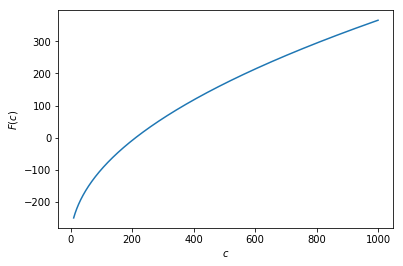

In [7]:
# Visualizing the root 

ytest = F1(x_)
#print(ytest)
fig = plt.figure()
plt.plot(x_, ytest, label="")
plt.xlabel('$c$')
plt.ylabel('$F(c)$')
plt.legend()
plt.show()

In [8]:
### linear weight density 
rho = 15
T0 = rho*c

print(rho, c, T0)

15 211.305459155 3169.58188733


## Estimating the Shape 
### $ y(x) = \frac{T_{0}}{\gamma} cosh( \frac{\gamma}{T_{0}} x ) $, scaled by $c$   
### $ x_{min} = - c\times cosh^{-1}(1+\frac{h1}{c})$
### $ x_{max} = + c\times cosh^{-1}(1+\frac{h2}{c})$

-188.693252541 111.306747457 211.305459155


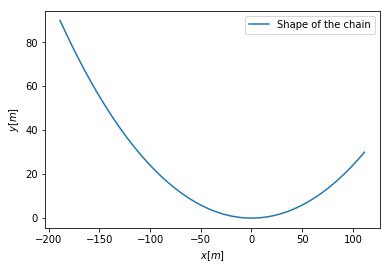

In [9]:
def Shape(x):
    y = (T0/rho)*np.cosh( (rho/T0)*(x) ) - T0/rho 
    return y

h = 0.5
xmin = - c*np.arccosh( 1 + h1/c )
xmax = + c*np.arccosh( 1 + h2/c )

print(xmin, xmax, T0/rho)

Npoints = (xmax-xmin)/h
x1_ = np.linspace(xmin, xmax, int(Npoints)+1)


y = Shape(x1_)

fig = plt.figure()
plt.plot(x1_, y, label="Shape of the chain")
plt.xlabel('$x[m]$')
plt.ylabel('$y[m]$')
plt.legend()
plt.show()

## Estimating the Tension 
### $ T(x) = T_{0} cosh( \frac{\gamma}{T_{0}}x ) $

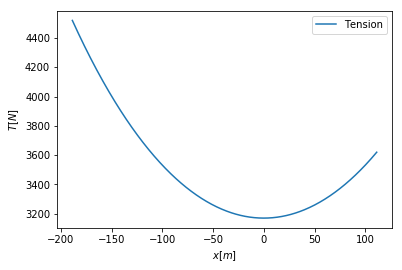

4519.58188733


In [18]:
def Tension(x):
    y = T0*np.cosh( (rho/T0)*x )
    return y

y = Tension(x1_)

fig = plt.figure()
plt.plot(x1_, y, label="Tension")
plt.xlabel('$x[m]$')
plt.ylabel('$T[N]$')
plt.legend()
plt.show()

print( y[0] )

## Estimating the Arc of length
$ s(x) = \frac{T_{0}}{\gamma} senh( \frac{\gamma}{T_{0}}x ) $

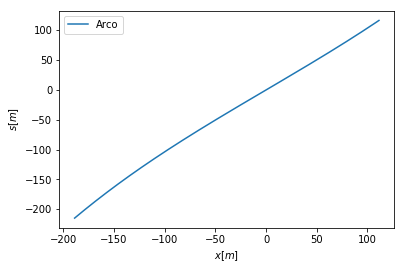

331.316636288


In [11]:
def Arco(x):
    y = (T0/rho)*np.sinh( (rho/T0)*x )
    return y

y = Arco(x1_)
#print(y)

fig = plt.figure()
plt.plot(x1_, y, label="Arco")
plt.xlabel('$x[m]$')
plt.ylabel('$s[m]$')
plt.legend()
plt.show()

s0 = abs(y[0])
sf = abs(y[-1])

length = s0 + sf
print(length)


## Equilibrium 1D:
### $\vec{T}(x)= \frac{mg}{L}x \hat{i}$ 

In [12]:
def StraigthString(x):
    y = rho*x
    return y

0.0 331.316636288


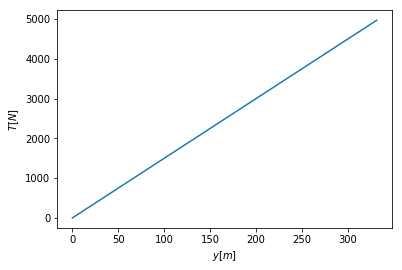

4969.74954431


In [19]:
h = 0.5
xmin = 0.
xmax = length

print(xmin, xmax)

Npoints = (xmax-xmin)/h
x2_ = np.linspace(xmin, xmax, int(Npoints)+1)


straigthy = StraigthString(x2_)


fig = plt.figure()
plt.plot(x2_, straigthy, label="")
plt.ylabel('$T[N]$')
plt.xlabel('$y[m]$')
plt.legend()
plt.show()

print( straigthy[-1] )